In [22]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

In [3]:
# Load IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2", force_download=True)
model = BertModel.from_pretrained("indobenchmark/indobert-base-p2", force_download=True)

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [9]:
# Example usage
text = "Halo, apa kabar?"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

# Get the embeddings
embeddings = outputs.last_hidden_state
print("last hidden state:", embeddings)

last hidden state: tensor([[[ 0.0121,  1.9223,  0.4172,  ...,  1.7263, -0.1523,  1.1101],
         [ 0.5779,  0.5788, -0.0461,  ..., -0.5975, -0.6402, -0.0919],
         [ 0.3282,  0.7175,  1.7906,  ..., -0.5492, -0.3556, -0.9598],
         ...,
         [ 0.5420, -0.0808,  2.2403,  ...,  1.1096, -0.2176,  1.1303],
         [ 0.1776,  1.4913,  1.6198,  ...,  1.7978, -0.1518,  1.1525],
         [ 0.2482,  1.2903,  1.7314,  ...,  0.7601, -0.3482,  0.3880]]],
       grad_fn=<NativeLayerNormBackward0>)


### Eksplorasi

CLS Embedding Shape: (768,)


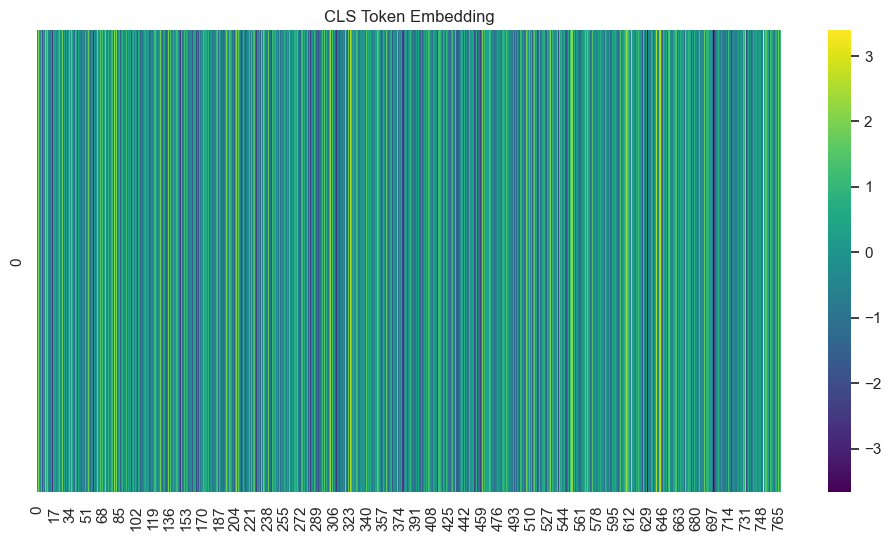

In [7]:
# Ekstraksi embedding dari CLS token
cls_embedding = embeddings[:, 0, :].squeeze().detach().numpy()
print("CLS Embedding Shape:", cls_embedding.shape)

# Optionally, visualize the embeddings using libraries like matplotlib or seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.heatmap(cls_embedding.reshape(1, -1), cmap="viridis", cbar=True)
plt.title("CLS Token Embedding")
plt.show()

In [17]:
# Membandingkan embedding kata yang sama dalam konteks yang berbeda

from transformers import BertTokenizer, BertModel
import torch
from scipy.spatial.distance import cosine

# Load IndoBERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained("indolem/indobert-base-uncased")
# model = BertModel.from_pretrained("indolem/indobert-base-uncased")

# Sample sentences for exploration
sentences = ["Saya suka makan nasi.", "Nasi adalah makanan pokok di Indonesia."]
embeddings = []
nasi_indices = []

# Get embeddings and indices of the word 'nasi'
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    embeddings.append(outputs.last_hidden_state[0].detach().numpy())
    
    # Find index of 'nasi' in the tokenized input
    tokenized_sentence = tokenizer.tokenize(sentence)
    nasi_idx = tokenized_sentence.index("nasi")
    nasi_indices.append(nasi_idx)

# Extract embeddings for 'nasi'
nasi_embedding1 = embeddings[0][nasi_indices[0]]
nasi_embedding2 = embeddings[1][nasi_indices[1]]

# Calculate cosine similarity between the embeddings of the word 'nasi'
similarity_nasi = 1 - cosine(nasi_embedding1, nasi_embedding2)
print(f"Cosine similarity between 'nasi' in different contexts: {similarity_nasi}")

Cosine similarity between 'nasi' in different contexts: 0.1893887221813202


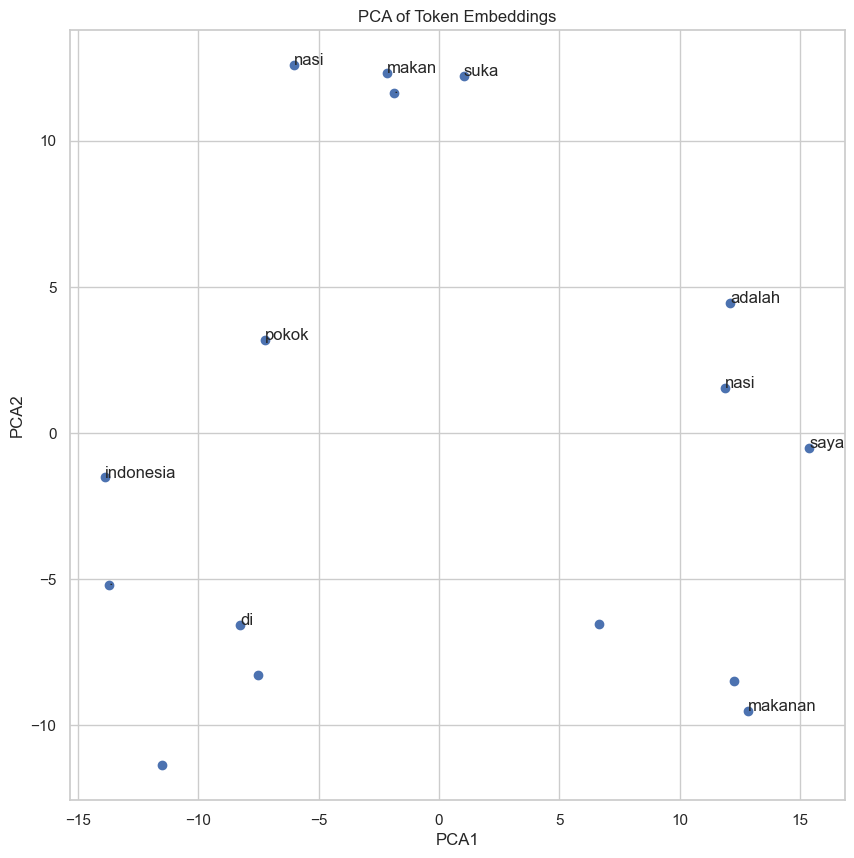

In [23]:
# Visualisasi embedding 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

all_tokens = []
all_embeddings = []


# Get embeddings and tokens for each sentence
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[0].detach().numpy()
    
    tokenized_sentence = tokenizer.tokenize(sentence)
    all_tokens.extend(tokenized_sentence)
    all_embeddings.extend(embeddings)

# Convert list to numpy array
all_embeddings = np.array(all_embeddings)

# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Plot the reduced embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

for i, token in enumerate(all_tokens):
    plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("PCA of Token Embeddings")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()
